In [1]:
import numpy as np
import pandas as pd

In [2]:
eco=pd.read_csv('ecosystem_data.csv')

In [3]:
eco

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded
...,...,...,...,...,...,...
9995,85.765599,263.111589,0.952275,75.403391,6.923449,degraded
9996,89.750884,14.044187,0.747824,76.452694,4.744065,at risk
9997,94.670792,91.109541,0.019456,26.956943,7.619473,degraded
9998,39.748799,132.996002,0.401005,43.431977,6.365560,degraded


In [4]:
eco.head()

,water_quality,air_quality_index,biodiversity_index,vegetation_cover,soil_ph,ecosystem_health
0,37.454012,112.092246,0.729998,63.814457,5.144016,degraded
1,95.071431,99.873629,0.184512,45.929245,4.021498,degraded
2,73.199394,52.846174,0.346640,96.449852,4.194976,degraded
3,59.865848,182.180001,0.663281,21.897845,4.493691,degraded
4,15.601864,142.987248,0.482089,58.785642,4.620093,degraded


In [5]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   water_quality       10000 non-null  float64
 1   air_quality_index   10000 non-null  float64
 2   biodiversity_index  10000 non-null  float64
 3   vegetation_cover    10000 non-null  float64
 4   soil_ph             10000 non-null  float64
 5   ecosystem_health    10000 non-null  object 
dtypes: float64(5), object(1)
memory usage: 468.9+ KB


In [7]:
eco.isnull().sum()

water_quality         0
air_quality_index     0
biodiversity_index    0
vegetation_cover      0
soil_ph               0
ecosystem_health      0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
eco.describe

<bound method NDFrame.describe of       water_quality  air_quality_index  biodiversity_index  vegetation_cover  \
0         37.454012         112.092246            0.729998         63.814457   
1         95.071431          99.873629            0.184512         45.929245   
2         73.199394          52.846174            0.346640         96.449852   
3         59.865848         182.180001            0.663281         21.897845   
4         15.601864         142.987248            0.482089         58.785642   
...             ...                ...                 ...               ...   
9995      85.765599         263.111589            0.952275         75.403391   
9996      89.750884          14.044187            0.747824         76.452694   
9997      94.670792          91.109541            0.019456         26.956943   
9998      39.748799         132.996002            0.401005         43.431977   
9999      21.714040          51.679444            0.257398         48.742370   

     

In [10]:
eco['ecosystem_health'].unique()

array(['degraded', 'at risk', 'healthy'], dtype=object)

In [13]:
eco['ecosystem_health'] = eco['ecosystem_health'].map({'healthy': 0, 'at risk': 1, 'degraded': 2})


In [15]:
X = eco.drop('ecosystem_health', axis=1)
y = eco['ecosystem_health']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [18]:
y_pred = model.predict(X_test)

In [19]:
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

In [20]:
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

Confusion Matrix:
 [[   6   15    0]
 [   1  140   81]
 [   0    0 1757]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.29      0.43        21
           1       0.90      0.63      0.74       222
           2       0.96      1.00      0.98      1757

    accuracy                           0.95      2000
   macro avg       0.91      0.64      0.72      2000
weighted avg       0.95      0.95      0.95      2000



In [22]:
import pickle
with open("naive_bayes_ecosystem_model.pkl", "wb") as f:
    pickle.dump(model, f)

In [23]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", round(accuracy * 100, 2), "%")

Accuracy of the model: 95.15 %


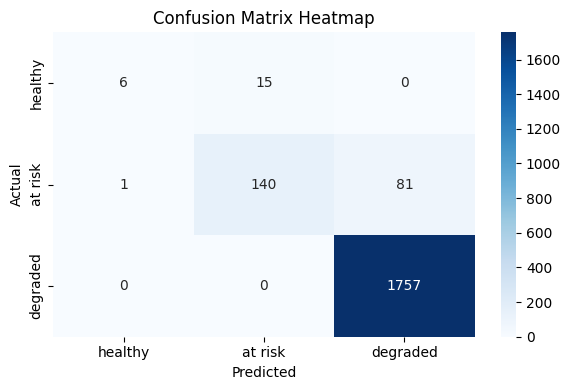

In [24]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['healthy', 'at risk', 'degraded'],
            yticklabels=['healthy', 'at risk', 'degraded'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()

In [26]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
